# Clustering Synthetic Beverage Sales Data

## **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

<hr>

**Sumber Dataset**:  
   https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales
   
**Informasi Dataset**:
   - **About Dataset**: This dataset was created to simulate realistic sales patterns in the beverage industry, highlighting important factors like regional preferences, seasonal fluctuations, and customer segmentation. It features both Business-to-Business (B2B) and Business-to-Consumer (B2C) transactions, making it adaptable for a variety of analytical purposes.
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: 20000 (dua puluh ribu) baris
   - **Jumlah Kolom**: 11 (sebelas) kolom
   - **Tipe Data**: Kategorikal dan Numerikal
     - *Kategorikal*: Order_ID, Customer_ID, Customer_Type, Product, Category, Region, Order_Date
     - *Numerikal*: Unit_Price, Quantity,Discount,Total_Price
      - Order_ID Unique identifier for each order. Groups multiple products within the same order.
      - Customer_ID Unique identifier for each customer, distinguishing individual buyers.
      - Customer_Type Indicates whether the customer is B2B (business-to-business) or B2C (business-to-consumer).
      - Product The name of the product purchased, such as "Coca-Cola" or "Erdinger Weißbier".
      - Category The product category, such as "Soft Drinks" or "Alcoholic Beverages".
      - Unit_Price The price per unit of the product.
      - Quantity The number of units purchased for the specified product in the order.
      - Discount The discount applied to the product (e.g., 0.1 for 10%). Discounts are only given to B2B customers.
      - Total_Price The total price for the product after applying discounts.
      - RegionThe region of the customer, such as "Bayern" or "Berlin".
      - Order_Date The date when the order was placed.

   Dataset yang diunduh diakhir setelah proses clustering oleh machine learning, akan dipakai untuk keperluan proses klarifikasi.

   link clasification :
   https://colab.research.google.com/drive/1nJJkKX7G7slIiNYl6W_OWXhJg7zMVgY6?usp=sharing

## **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [78]:
# Import library yang diperlukan untuk analisis clustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, PowerTransformer, QuantileTransformer, LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA, FastICA, NMF, KernelPCA
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.pipeline import Pipeline
from scipy.stats import pearsonr
from itertools import combinations
from scipy.stats import zscore
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples

## **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [79]:
# Memuat dataset ke dalam notebook
file_id = "12C0vc5U9twA1ip-dONj79u8XoLCX_xgL"
df = pd.read_csv(f"https://drive.google.com/uc?id={file_id}")
df


,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD6702,CUS9021,B2C,Coca-Cola,Soft Drinks,1.10,9,0.0,9.90,Brandenburg,2023-01-19
1,ORD6703,CUS7392,B2C,Club Mate,Soft Drinks,2.26,13,0.0,29.38,Niedersachsen,2023-01-11
2,ORD6703,CUS7392,B2C,Mango Juice,Juices,3.31,8,0.0,26.48,Niedersachsen,2023-01-11
3,ORD6704,CUS5204,B2C,Pepsi,Soft Drinks,1.74,7,0.0,12.18,Baden-Württemberg,2023-08-27
4,ORD6704,CUS5204,B2C,Cranberry Juice,Juices,3.67,12,0.0,44.04,Baden-Württemberg,2023-08-27
...,...,...,...,...,...,...,...,...,...,...,...
19994,ORD13426,CUS2413,B2C,Tomato Juice,Juices,3.23,9,0.0,29.07,Bremen,2021-01-05
19995,ORD13426,CUS2413,B2C,Volvic Touch,Water,1.38,10,0.0,13.80,Bremen,2021-01-05
19996,ORD13426,CUS2413,B2C,Cranberry Juice,Juices,3.46,2,0.0,6.92,Bremen,2021-01-05
19997,ORD13426,CUS2413,B2C,Beck's,Alcoholic Beverages,1.33,4,0.0,5.32,Bremen,2021-01-05


**Insight Data Loading :**

  Dataset disimpan dalam google drive, dan id file dalam google drive diambil. Setelah itu dataset dalam url google drive dibaca oleh pandas dengan format csv. File asli synthetic_beverage_sales_data.csv memiliki total baris lebih dari 8 juta, karena data yang terlalu banyak dapat menyebabkan overfitting, dan device saya tidak mencukupi terlalu banyak data. Maka dari itu, saya mengambil hanya 20.000 data ditengah dataset tersebut.

  **Informasi tambahan :**
  
  1. Banyak baris yang ada adalah 20.000
  2. Banyak kolom yang ada adalah 11

## **4. Exploratory Data Analysis (EDA)**

**Exploratory Data Analysis (EDA)** bertujuan untuk memahami karakteristik dataset. Dengan:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### 1. Memahami Struktur Data

In [80]:
#Tinjau jumlah baris dan kolom dalam dataset.
print("Jumlah baris dan kolom:", df.shape)

Jumlah baris dan kolom: (19999, 11)


In [81]:
#Tinjau jenis data di setiap kolom (numerikal atau kategorikal).
print("\nTipe data setiap kolom:\n", df.dtypes)


Tipe data setiap kolom:
 Order_ID          object
Customer_ID       object
Customer_Type     object
Product           object
Category          object
Unit_Price       float64
Quantity           int64
Discount         float64
Total_Price      float64
Region            object
Order_Date        object
dtype: object


**Insight Exploritary Data**

  1. Terdapat 20.000 baris dan 11 kolom dalam dataset synthetic beverage sales data
  2. Terdapat 4 kolom bertipe data numeric, dan 7 kolom bertipe data string (kategorikal)

### 2. Menangani Data yang Hilang

In [82]:
#Identifikasi dan analisis data yang hilang (missing values).
print("Jumlah data yang hilang:\n", df.isnull().sum())

Jumlah data yang hilang:
 Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


**Insight Exploritary Data**

  1. Terdapat 20.000 baris dan 11 kolom dalam dataset synthetic beverage sales data
  2. Terdapat 4 kolom bertipe data numeric, dan 7 kolom bertipe data string (kategorikal)
  3. Dari 20.000 baris dan 11 kolom tidak terdapat data yang hilang (kosong)

### 3. Analisis Distribusi dan Korelasi

In [83]:
# Analisis distribusi variabel numerik dengan statistik deskriptif
print("Statistik Deskriptif untuk variabel numerik:\n\n", df.describe())

Statistik Deskriptif untuk variabel numerik:

          Unit_Price      Quantity      Discount   Total_Price
count  19999.000000  19999.000000  19999.000000  19999.000000
mean       5.740623     23.013751      0.029756    128.932640
std       14.543103     26.762868      0.044847    513.192739
min        0.320000      1.000000      0.000000      0.380000
25%        1.050000      6.000000      0.000000      8.520000
50%        1.770000     11.000000      0.000000     21.170000
75%        3.210000     30.000000      0.050000     69.030000
max      133.150000    100.000000      0.150000  10521.090000


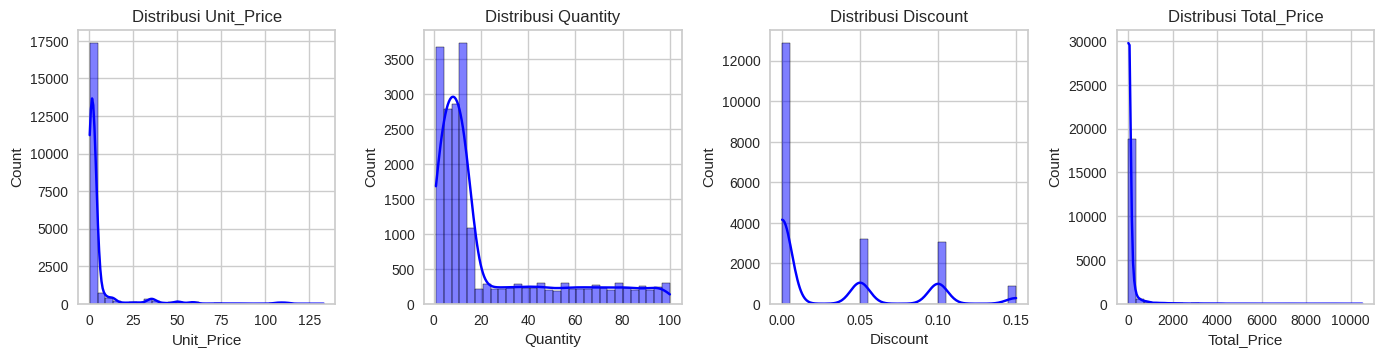

In [84]:
# Visualisasi seperti histogram atau boxplot
# Distribusi fitur numerik
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(df_numeric.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

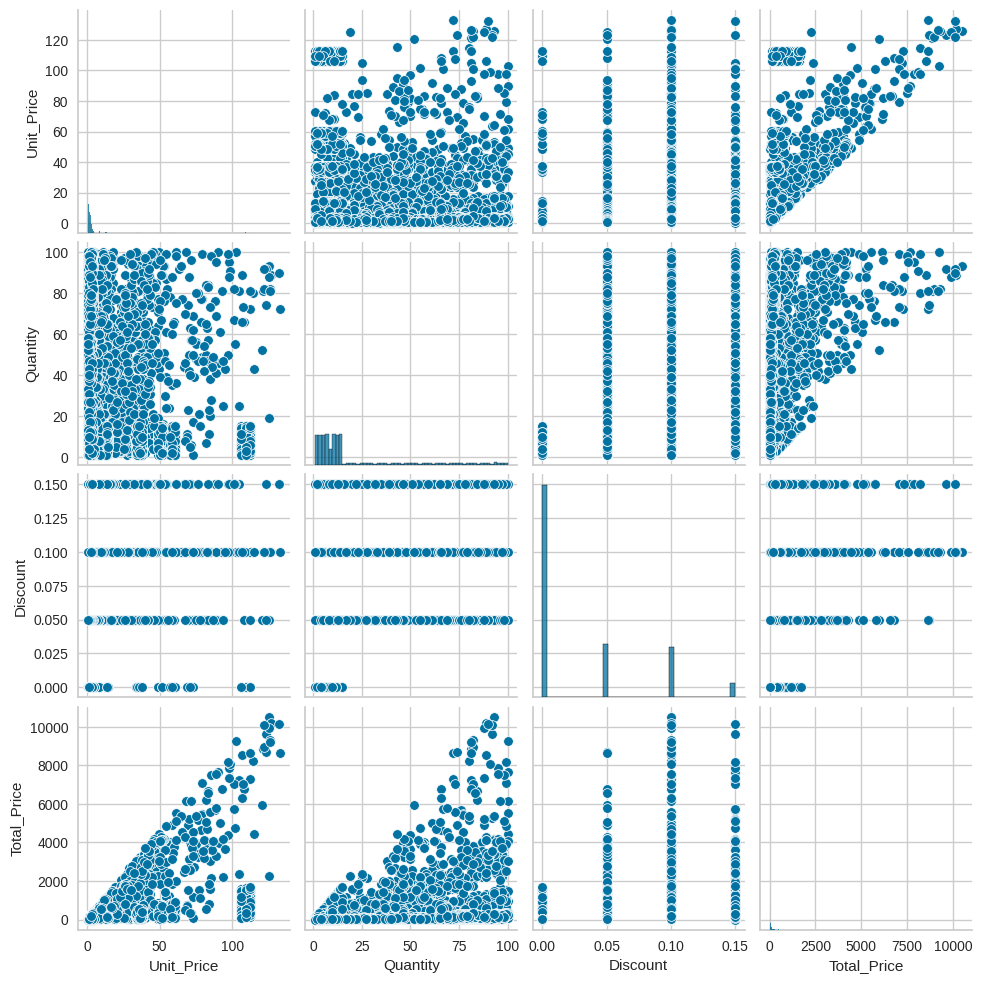

In [85]:
#Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

df_numeric = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[df_numeric].dropna())
plt.show()

**Insight Exploritary Data**

  1. Terdapat 20.000 baris dan 11 kolom dalam dataset synthetic beverage sales data
  2. Terdapat 4 kolom bertipe data numeric, dan 7 kolom bertipe data string (kategorikal)
  3. Dari 20.000 baris dan 11 kolom tidak terdapat data yang hilang (kosong)
  4. Persebaran data dalam kolom numerik terlihat ada data yang terlalu besar (outlier) seperti di kolom Unit_Price dan Quantity

    - Unit_Price : Harga perbarang memiliki rata-rata 5.74. Dengan harga produk yang sangat murah (0.32) dan sangat mahal (133.15). Dikarenakan Standar Deviasi yang cukup besar yaitu 14.54, maka kemungkinan ada outlier.
    - Quantity : Rata-rata jumlah barang yang terjual per transaksi sekitar 23 unit. Mayoritas transaksi membeli jumlah barang yang relatif kecil (≤ 11), tetapi ada beberapa transaksi besar yang meningkatkan rata-rata.
    - Discount : Kebanyakan data tidak mendapat diskon (0%). Tetapi ada juga yang memberikan diskon dan yang paling besar 15%
    - Total Price : Ada transaksi yang sangat kecil (0.38) dan transaksi yang sangat besar (10,521). Sehingga menaikkan rata-rata total harga.

### 4. Visualisasi Data

In [86]:
data = df.drop(columns=['Order_ID', 'Customer_ID', 'Order_Date'])
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  19999 non-null  object 
 1   Product        19999 non-null  object 
 2   Category       19999 non-null  object 
 3   Unit_Price     19999 non-null  float64
 4   Quantity       19999 non-null  int64  
 5   Discount       19999 non-null  float64
 6   Total_Price    19999 non-null  float64
 7   Region         19999 non-null  object 
dtypes: float64(3), int64(1), object(4)
memory usage: 1.2+ MB


<ipython-input-87-52ee404c600e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-87-52ee404c600e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-87-52ee404c600e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-87-52ee404c600e>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




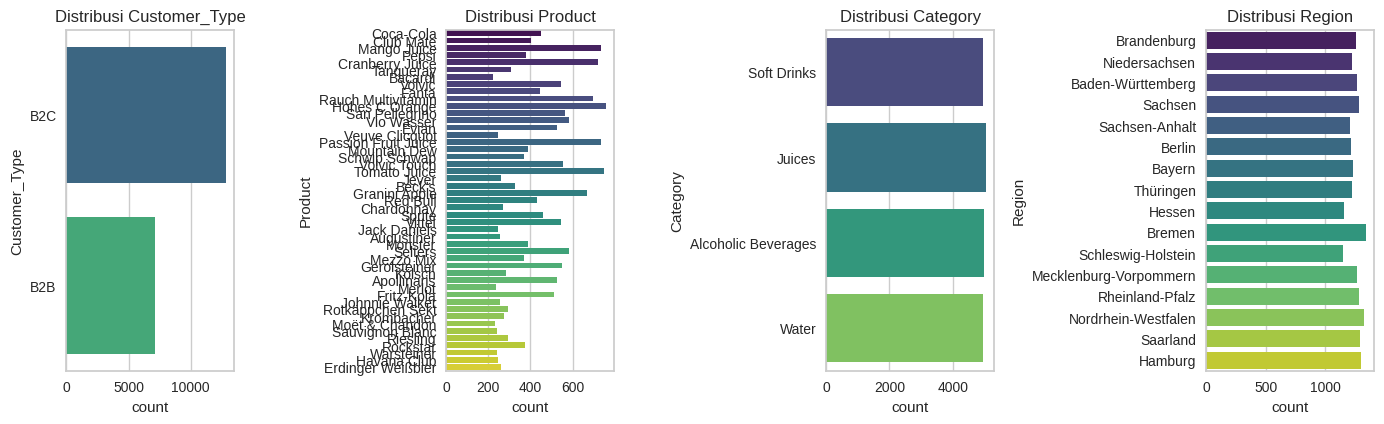

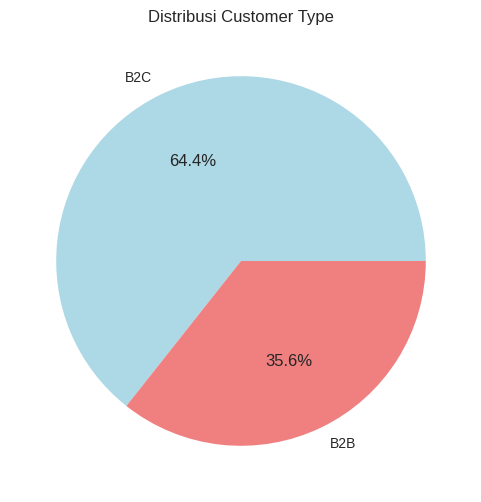

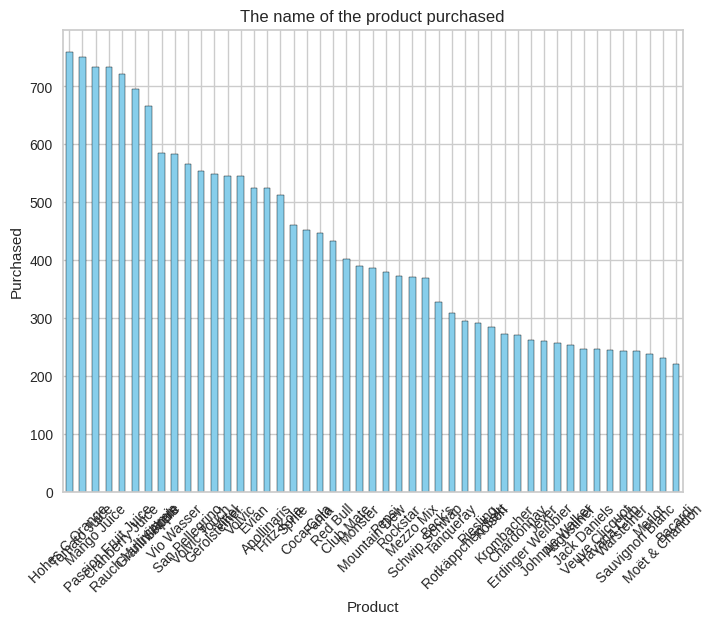

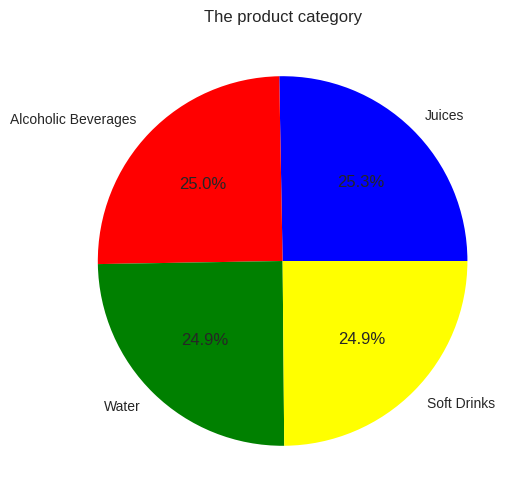

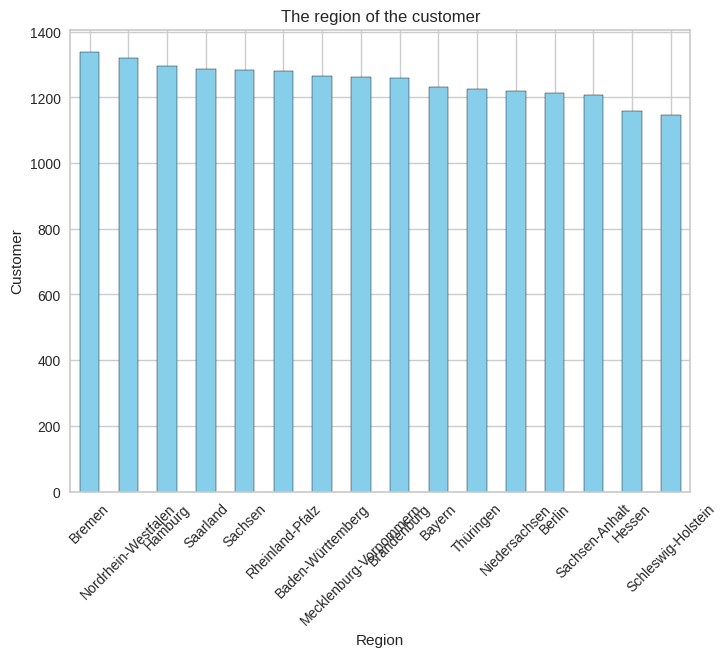

In [87]:
# Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.

# Distribusi fitur kategorikal
cat_features = data.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(2, 4, i)
    sns.countplot(y=data[column], palette='viridis')
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

# Pie Chart - Distribusi Customer Type
plt.figure(figsize=(6, 6))
df['Customer_Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightcoral', 'lightgreen'])
plt.title('Distribusi Customer Type')
plt.ylabel('')  # Menghilangkan label default
plt.show()

# Bar Chart - Distribusi Product
plt.figure(figsize=(8, 6))
df['Product'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The name of the product purchased')
plt.xlabel('Product')
plt.ylabel('Purchased')
plt.xticks(rotation=45)
plt.show()

# Pie Chart - Distribusi Customer Type
plt.figure(figsize=(6, 6))
df['Category'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red', 'green','yellow'])
plt.title('The product category')
plt.ylabel('')  # Menghilangkan label default
plt.show()

# Bar Chart - Distribusi Region
plt.figure(figsize=(8, 6))
df['Region'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('The region of the customer')
plt.xlabel('Region')
plt.ylabel('Customer')
plt.xticks(rotation=45)
plt.show()

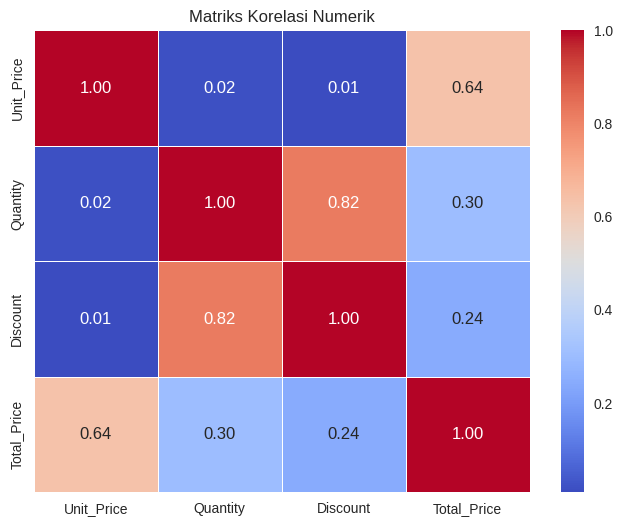

In [88]:
# Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel

df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(method="pearson"), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Numerik")
plt.show()

**Insight Exploritary Data**

  1. Terdapat 20.000 baris dan 11 kolom dalam dataset synthetic beverage sales data
  2. Terdapat 4 kolom bertipe data numeric, dan 7 kolom bertipe data string (kategorikal)
  3. Dari 20.000 baris dan 11 kolom tidak terdapat data yang hilang (kosong)
  4. Persebaran data dalam kolom numerik terlihat ada data yang terlalu besar (outlier) seperti di kolom Unit_Price dan Quantity

    - Unit_Price : Harga perbarang memiliki rata-rata 5.74. Dengan harga produk yang sangat murah (0.32) dan sangat mahal (133.15). Dikarenakan Standar Deviasi yang cukup besar yaitu 14.54, maka kemungkinan ada outlier.
    - Quantity : Rata-rata jumlah barang yang terjual per transaksi sekitar 23 unit. Mayoritas transaksi membeli jumlah barang yang relatif kecil (≤ 11), tetapi ada beberapa transaksi besar yang meningkatkan rata-rata.
    - Discount : Kebanyakan data tidak mendapat diskon (0%). Tetapi ada juga yang memberikan diskon dan yang paling besar 15%
    - Total Price : Ada transaksi yang sangat kecil (0.38) dan transaksi yang sangat besar (10,521). Sehingga menaikkan rata-rata total harga.

5. Kolom Order_ID, Customer_ID, dan Order_Date karena tidak akan memberikan korelasi apapun maka dihapus dari dataframe

6. Dapat dilihat dari Grafik distribusi
  -  Product paling banyak penjualan di mango juice (juices) dan jack daniels (alcohol)
  - Pesebaran Category bisa dibilang normal dengan persentase juices 25.3%, Soft Drink 24.9%, Water 24,9% dan Alcohol 25%.
  - Data dalam region, dan custumer_type tidak banyak memberikan korelasi.

## **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [89]:
#Menghapus atau Menangani Data Kosong (Missing Values)
missing_values = df.isnull().sum()
print("Jumlah data yang hilang untuk setiap fitur:")
print(missing_values)

Jumlah data yang hilang untuk setiap fitur:
Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64


**Insight Data Prepossesing :**

1. Tidak ada data yang kosong. Sehingga tidak perlu tahap pengisian missing value.

In [90]:
#Menghapus Data Duplikat
print("Jumlah data duplikat sebelum penghapusan:", df.duplicated().sum())

Jumlah data duplikat sebelum penghapusan: 0


**Insight Data Prepossesing :**

1. Tidak ada data yang kosong. Sehingga tidak perlu tahap pengisian missing value.
2. Tidak ada data duplikat. Sehingga tidak perlu menghapus data lagi.

In [91]:
#Normalisasi atau Standarisasi Fitur

df_numeric = df.select_dtypes(include=[np.number]).columns

# Inisialisasi scaler
scaler = MinMaxScaler()

# Simpan statistik sebelum normalisasi
before_normalization = df[df_numeric].describe()

# Lakukan normalisasi langsung di df
df[df_numeric] = scaler.fit_transform(df[df_numeric])

# Simpan statistik setelah normalisasi
after_normalization = df[df_numeric].describe()

print("Statistik Sebelum Normalisasi:\n", before_normalization)
print("\nStatistik Setelah Normalisasi:\n", after_normalization)


Statistik Sebelum Normalisasi:
          Unit_Price      Quantity      Discount   Total_Price
count  19999.000000  19999.000000  19999.000000  19999.000000
mean       5.740623     23.013751      0.029756    128.932640
std       14.543103     26.762868      0.044847    513.192739
min        0.320000      1.000000      0.000000      0.380000
25%        1.050000      6.000000      0.000000      8.520000
50%        1.770000     11.000000      0.000000     21.170000
75%        3.210000     30.000000      0.050000     69.030000
max      133.150000    100.000000      0.150000  10521.090000

Statistik Setelah Normalisasi:
          Unit_Price      Quantity      Discount   Total_Price
count  19999.000000  19999.000000  19999.000000  19999.000000
mean       0.040809      0.222361      0.198377      0.012219
std        0.109487      0.270332      0.298983      0.048779
min        0.000000      0.000000      0.000000      0.000000
25%        0.005496      0.050505      0.000000      0.000774
50%  

**Insight Data Prepossesing :**

1. Tidak ada data yang kosong. Sehingga tidak perlu tahap pengisian missing value.
2. Tidak ada data duplikat. Sehingga tidak perlu menghapus data lagi.
3. Data sebelum nya sudah berhasil dinormalisasikan, dan langsung disimpan dalam df.

Jumlah Data Sebelum Menghapus Outlier: 19999
Jumlah Data Setelah Menghapus Outlier: 15110
Jumlah Data yang Dihapus: 4889


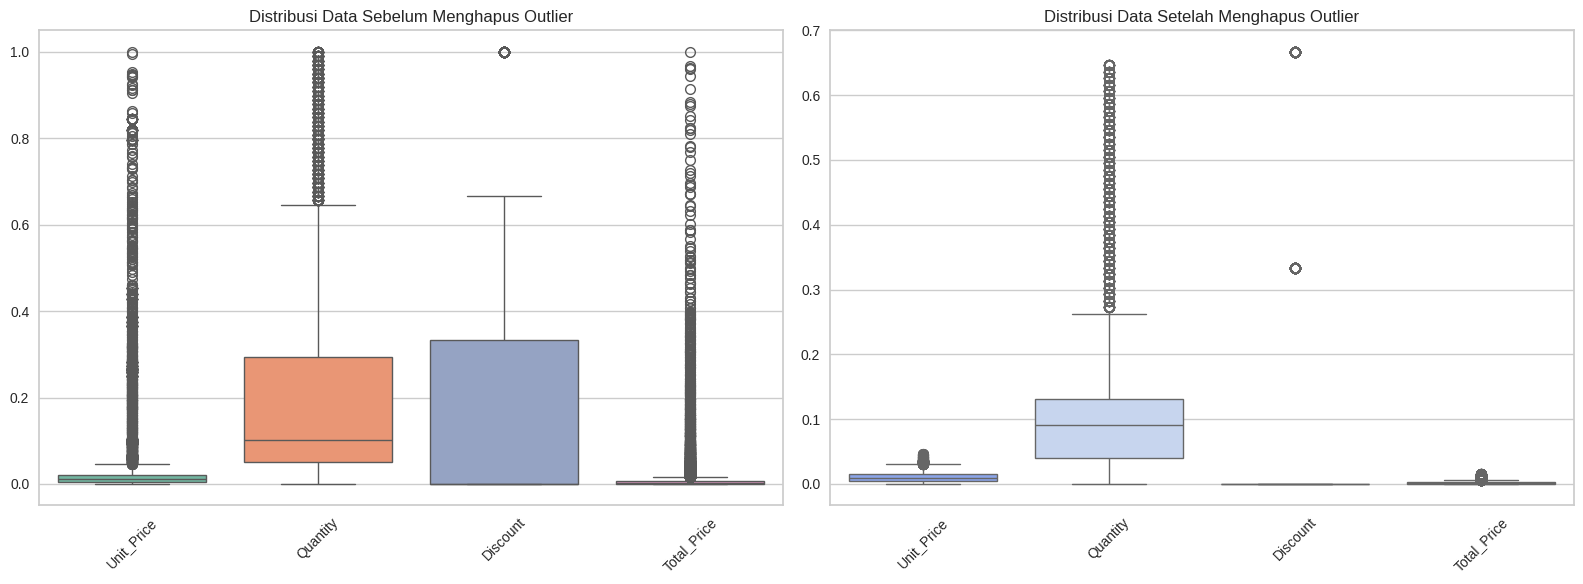

In [92]:
#Deteksi dan Penanganan Outlier

def detect_and_drop_outliers(df, columns, z_thresh=2.0):
    df_clean = df.copy()

    # Hitung Q1, Q3, dan IQR
    Q1 = df_clean[columns].quantile(0.25)
    Q3 = df_clean[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Tentukan batas bawah dan atas berdasarkan IQR
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Hitung Z-score
    z_scores = df_clean[columns].apply(zscore)

    # Deteksi Outlier: Nilai di luar IQR atau memiliki Z-score lebih besar dari threshold
    outliers = ((df_clean[columns] < lower_bound) | (df_clean[columns] > upper_bound)) | (z_scores.abs() > z_thresh)

    # Hapus outlier langsung dari df
    df.drop(index=df_clean[outliers.any(axis=1)].index, inplace=True)

# Pilih hanya kolom numerik
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()

# Simpan salinan data sebelum pembersihan untuk visualisasi
df_before = df.copy()

# Hapus outlier dari dataset
detect_and_drop_outliers(df, num_columns, z_thresh=2.5)

# Cetak ringkasan hasil pembersihan outlier
print(f"Jumlah Data Sebelum Menghapus Outlier: {len(df_before)}")
print(f"Jumlah Data Setelah Menghapus Outlier: {len(df)}")
print(f"Jumlah Data yang Dihapus: {len(df_before) - len(df)}")

# Visualisasi Data Sebelum dan Sesudah
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(data=df_before[num_columns], palette="Set2", ax=axes[0])
axes[0].set_title("Distribusi Data Sebelum Menghapus Outlier")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df[num_columns], palette="coolwarm", ax=axes[1])
axes[1].set_title("Distribusi Data Setelah Menghapus Outlier")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Insight Data Prepossesing :**

1. Tidak ada data yang kosong. Sehingga tidak perlu tahap pengisian missing value.
2. Tidak ada data duplikat. Sehingga tidak perlu menghapus data lagi.
3. Data sebelum nya sudah berhasil dinormalisasikan, dan langsung disimpan dalam df.
4. Terdeteksi terdapat outlier, tapi sudah dihandle dengan menggunakan replacement dengan nilai IQR. Terdapat 4889 data yang direplace sesuai dengan nilai dalam IQRnya.

In [93]:
categorical_columns = ['Customer_Type', 'Category', 'Product', 'Region']

# Dictionary untuk menyimpan LabelEncoder
label_encoders = {}

# Encoding data
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le  # Simpan encoder untuk inverse transform

# Tampilkan hasil encoding
print("Data setelah encoding:")
data.head()

Data setelah encoding:


,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region
0,1,6,2,1.10,9,0.0,9.90,3
1,1,5,2,2.26,13,0.0,29.38,8
2,1,21,1,3.31,8,0.0,26.48,8
3,1,28,2,1.74,7,0.0,12.18,0
4,1,7,1,3.67,12,0.0,44.04,0


**Insight Data Prepossesing :**

1. Tidak ada data yang kosong. Sehingga tidak perlu tahap pengisian missing value.
2. Tidak ada data duplikat. Sehingga tidak perlu menghapus data lagi.
3. Data sebelum nya sudah berhasil dinormalisasikan, dan langsung disimpan dalam df.
4. Terdeteksi terdapat outlier, tapi sudah dihandle dengan menggunakan replacement dengan nilai IQR. Terdapat 4889 data yang direplace sesuai dengan nilai dalam IQRnya.
5. Label telah selesai diencoding dengan label encoding pada kategorikal kolom. Sehingga, sekarang dataset hanya berisikan kolom numerik yang dapat diolah lebih lanjut ke proses pemodelan.

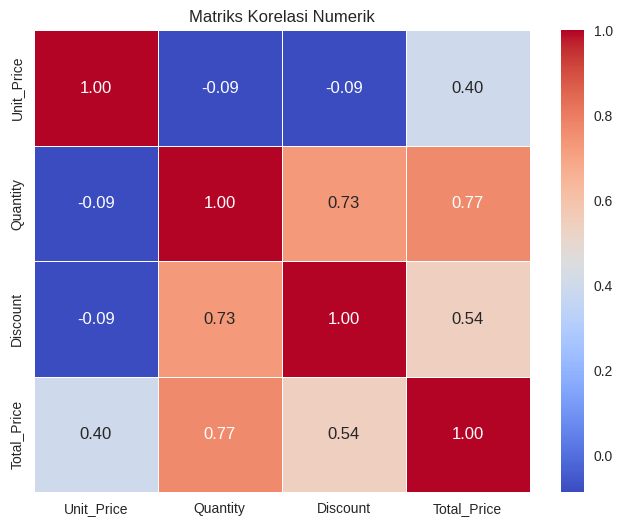

In [94]:
df_numeric = df.select_dtypes(include=[np.number])
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(method="pearson"), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriks Korelasi Numerik")
plt.show()

**Insight Data Prepossesing :**

1. Tidak ada data yang kosong. Sehingga tidak perlu tahap pengisian missing value.
2. Tidak ada data duplikat. Sehingga tidak perlu menghapus data lagi.
3. Data sebelum nya sudah berhasil dinormalisasikan, dan langsung disimpan dalam df.
4. Terdeteksi terdapat outlier, tapi sudah dihandle dengan menggunakan replacement dengan nilai IQR. Terdapat 4889 data yang direplace sesuai dengan nilai dalam IQRnya.
5. Label telah selesai diencoding dengan label encoding pada kategorikal kolom. Sehingga, sekarang dataset hanya berisikan kolom numerik yang dapat diolah lebih lanjut ke proses pemodelan.
6. Setelah kolom sudah di encode, kita dapat melihat  lebih lanjut korelasi antar kolom.
    - korelasi positif : discount - quantity, unit_price - total_price.
    - korelasi negatif : discount - costumer_type, costumer_type - quantity.

## **6. Pembangunan Model Clustering**

### **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

Jumlah masing-masing cluster:
Cluster
0    19181
1      160
2      618
3       40
Name: count, dtype: int64


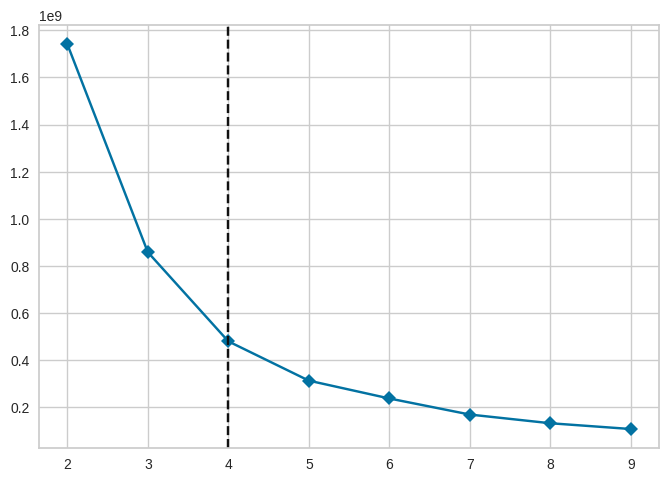

In [95]:
## a. Pembangunan Model Clustering
# Define numerical and categorical features
numerical_features = ["Customer_Type", "Category", "Unit_Price", "Quantity", "Discount", "Total_Price"]
categorical_features = []

# Ordinal Encode categorical features
encoder = OrdinalEncoder()
data[categorical_features] = encoder.fit_transform(data[categorical_features])

# Combine selected features
selected_features = numerical_features + categorical_features
X = data[selected_features]

# Menentukan jumlah cluster optimal dengan Elbow Method
model = KMeans(n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 10), metric='distortion', timings=False)
visualizer.fit(X)

# Membangun model clustering awal
k_optimal = visualizer.elbow_value_
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
initial_labels = kmeans.fit_predict(X)
data['Cluster'] = initial_labels

# Menghitung jumlah cluster dalam kolom 'cluster'
cluster_counts = data['Cluster'].value_counts()
print("Jumlah masing-masing cluster:")
print(cluster_counts.sort_index(ascending=True))

**Insight Modelling :**

1. Algoritma yang dipakai dalam pemodelan unlabeled dataset ini adalah K-Means. Algoritma ini akan mengelompokkan data yang memiliki karakteristik yang mirip satu sama lain.
2. Perhitungan K pada K-Means saya tentukan diawal dengan menghitungnya dengan elbow method.
2. Pesebaran dalam cluster dipengaruhi dari korelasi tiap model, dan jarak yang ada dari steroid yang sudah ditentukan oleh model.

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  19999 non-null  int64  
 1   Product        19999 non-null  int64  
 2   Category       19999 non-null  int64  
 3   Unit_Price     19999 non-null  float64
 4   Quantity       19999 non-null  int64  
 5   Discount       19999 non-null  float64
 6   Total_Price    19999 non-null  float64
 7   Region         19999 non-null  int64  
 8   Cluster        19999 non-null  int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 1.3 MB


### **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

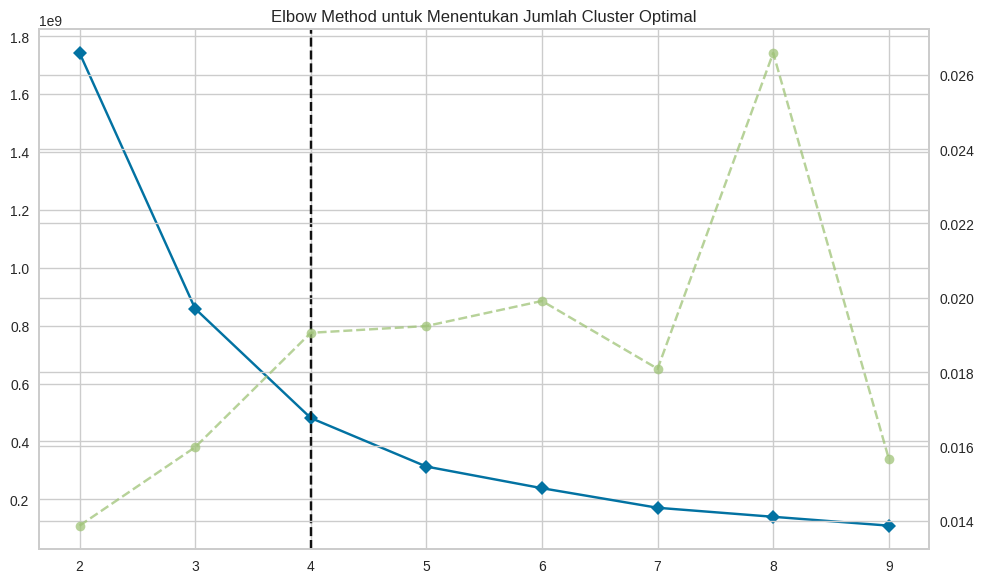

Jumlah cluster optimal berdasarkan Elbow Method: 4
Silhouette Score sebelum Feature Selection: 0.8908


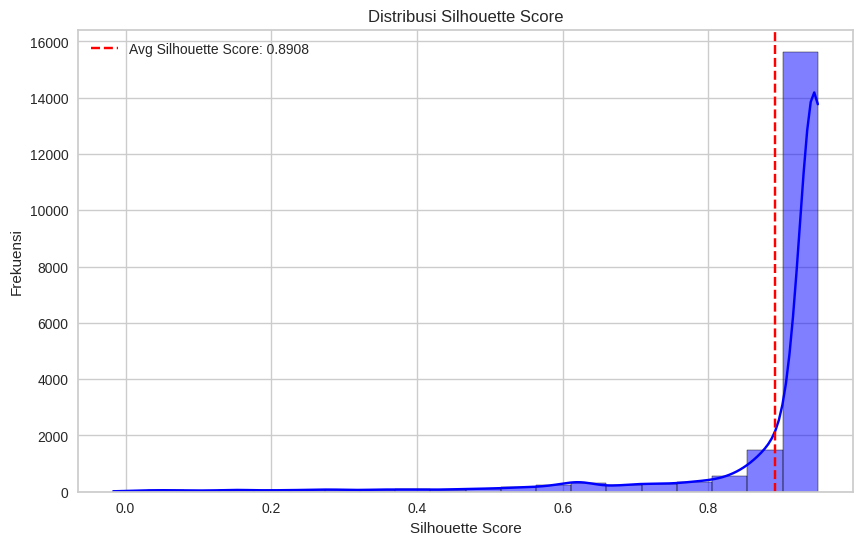

In [97]:
## b. Evaluasi Model Clustering
# Elbow Method untuk Menentukan Jumlah Cluster Optimal
# Tentukan jumlah cluster optimal dengan Elbow Method
fig, ax = plt.subplots(figsize=(10, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10), ax=ax)
visualizer.fit(X)

plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')
plt.tight_layout()
plt.show()

print(f"Jumlah cluster optimal berdasarkan Elbow Method: {k_optimal}")

# Lakukan clustering dengan k_optimal
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
initial_labels = kmeans.fit_predict(X)

# Evaluasi clustering menggunakan silhouette score
silhouette_before = silhouette_score(X, initial_labels)
print(f"Silhouette Score sebelum Feature Selection: {silhouette_before:.4f}")

# Hitung nilai Silhouette untuk setiap sampel
silhouette_values = silhouette_samples(X, initial_labels)

# Visualisasi distribusi Silhouette Score
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(silhouette_values, bins=20, kde=True, color='blue', ax=ax)
ax.axvline(silhouette_before, color='red', linestyle='dashed', label=f'Avg Silhouette Score: {silhouette_before:.4f}')
ax.set_title('Distribusi Silhouette Score')
ax.set_xlabel('Silhouette Score')
ax.set_ylabel('Frekuensi')
ax.legend()
plt.show()

**Insight Modelling :**

1. Evaluasi model dilakukan dengan menghitung silhoutte score dan jumlah cluster dengan elbow method.
2. Hasil dari evaluasi model sangat memuaskan untuk jumlah data 20.000 baris yakni 0.8849 yang menunjukkan pengukuran terhadap seberapa baik setiap data point diklasifikasikan dalam cluster-nya sendiri dibandingkan dengan cluster lain.
3. Hasil dari banyak nya cluster dihitung dengan elbow method dan menghasilkan cluster optimal yaitu 4.

### **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [98]:
df=data
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,1,6,2,1.10,9,0.0,9.90,3,0
1,1,5,2,2.26,13,0.0,29.38,8,0
2,1,21,1,3.31,8,0.0,26.48,8,0
3,1,28,2,1.74,7,0.0,12.18,0,0
4,1,7,1,3.67,12,0.0,44.04,0,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  19999 non-null  int64  
 1   Product        19999 non-null  int64  
 2   Category       19999 non-null  int64  
 3   Unit_Price     19999 non-null  float64
 4   Quantity       19999 non-null  int64  
 5   Discount       19999 non-null  float64
 6   Total_Price    19999 non-null  float64
 7   Region         19999 non-null  int64  
 8   Cluster        19999 non-null  int32  
dtypes: float64(3), int32(1), int64(5)
memory usage: 1.3 MB


5 Fitur Terpenting Berdasarkan Random Forest: ['Total_Price', 'Unit_Price', 'Quantity', 'Category', 'Discount']


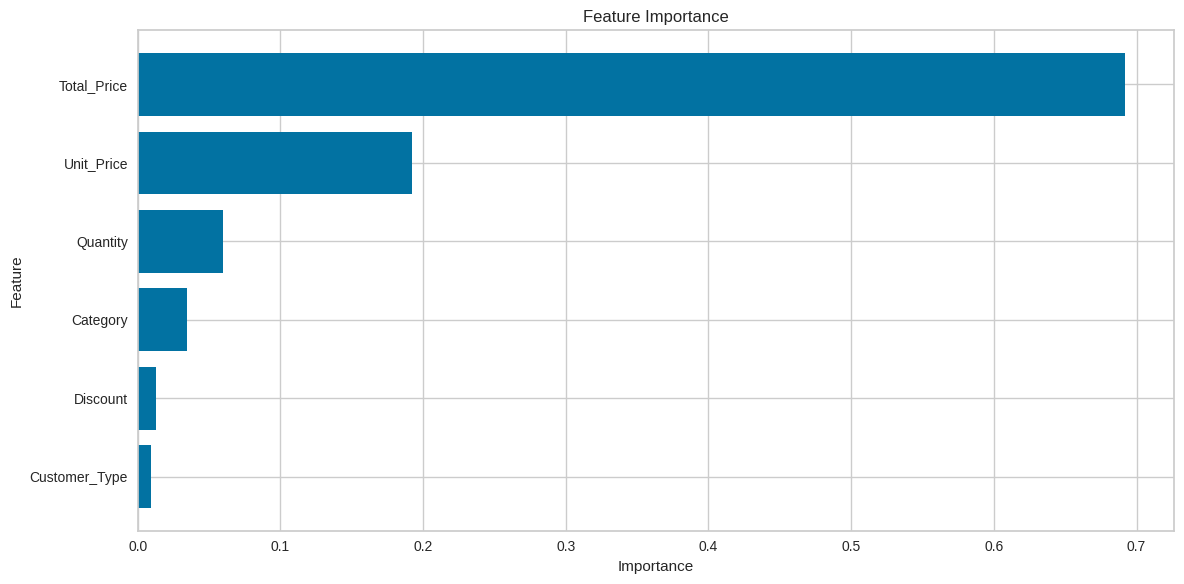


=== Hasil Akhir ===
Silhouette Score terbaik setelah Feature Selection: 0.8969
Perbedaan Silhouette Score setelah Feature Selection: 0.0061
Peningkatan: 0.68%


In [100]:
## c. Feature Selection (Opsional)
# Feature Selection dengan Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, initial_labels)

# Get feature importance
feature_importance = sorted(zip(selected_features, rf.feature_importances_), key=lambda x: x[1], reverse=True)

# Select top features
n_top_features = 5
top_features = [f[0] for f in feature_importance[:n_top_features]]
print(f"{n_top_features} Fitur Terpenting Berdasarkan Random Forest:", top_features)

# Visualize feature importance
plt.figure(figsize=(12, 6))
sorted_features = sorted(feature_importance, key=lambda x: x[1])
features = [x[0] for x in sorted_features]
importances = [x[1] for x in sorted_features]
plt.barh(features, importances)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

# Reduce dataset ke fitur terpilih
X_selected = df[top_features]

# Hyperparameter tuning pada K-Means
best_score = -1
best_kmeans = None

for random_state in [0, 7, 42, 99]:
    for n_init in [10, 30, 50]:
        kmeans_selected = KMeans(n_clusters=k_optimal, random_state=random_state, n_init=n_init)
        labels = kmeans_selected.fit_predict(X_selected)
        score = silhouette_score(X_selected, labels)
        if score > best_score:
            best_score = score
            best_kmeans = kmeans_selected

# Update cluster dengan hasil terbaik
df['Cluster'] = best_kmeans.predict(X_selected)

# Print final results
print("\n=== Hasil Akhir ===")
print(f"Silhouette Score terbaik setelah Feature Selection: {best_score:.4f}")
print(f"Perbedaan Silhouette Score setelah Feature Selection: {best_score - silhouette_before:.4f}")
print(f"Peningkatan: {(best_score - silhouette_before) / silhouette_before * 100:.2f}%")

**Insight Feature Selection :**

1. Feature Selection yang saya lakukan adalah dengan mencari fitur penting dengan parameter dalam algoritma Random Forest.
2. Hasil dari feature selection ini mementingkan fitur seperti Total_Price, Unit_Price, dan Quantity. Sedangkan region tidak dijadikan sebagai fitur yang berpengaruh penting.
3. Setelah Feature selection dilakukan, dan dilakukan pengujian evaluasi lagi, Silhouette Score naik 0.81% dan memberikan evaluasi yang baik dalam pemodelan.
4. Dari hasil feature selection, dapat diambil kesimpulan analisis bahwa Total_Price, Unit_Price, dan Quantity memegang karakteristik paling pengaruh dalam proses clustering.

### **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

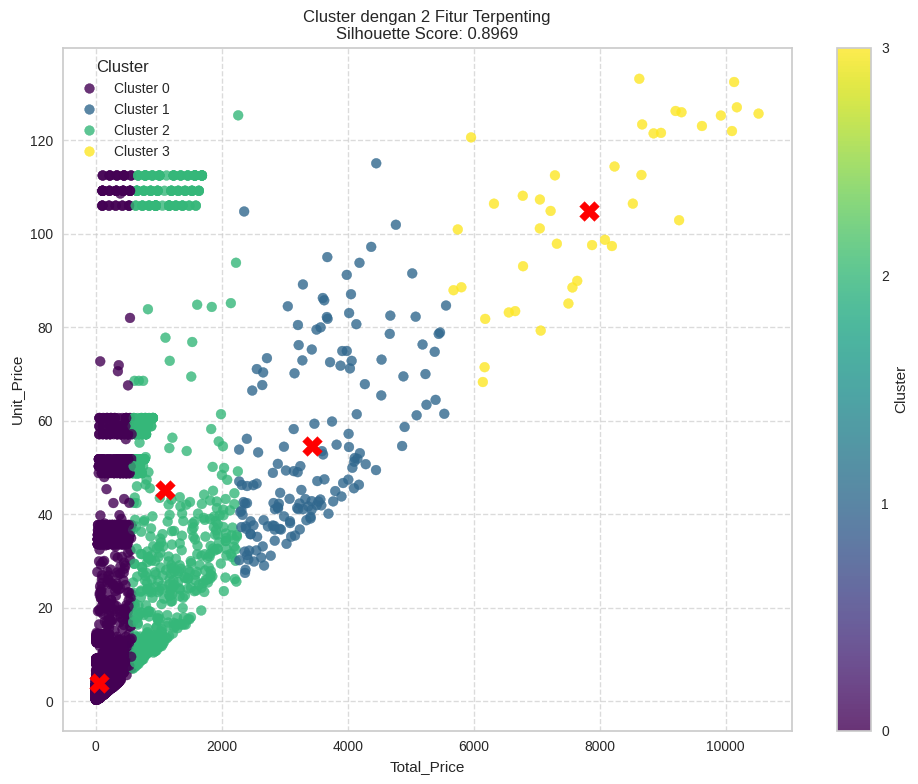

In [101]:
# Visualize final clusters
if len(top_features) >= 2:
    plt.figure(figsize=(10, 8))

    # Scatter plot for each cluster
    scatter = plt.scatter(X_selected[top_features[0]], X_selected[top_features[1]], c=df['Cluster'], cmap='viridis', s=50, alpha=0.8)

    # Calculate centroids
    centroids = df.groupby('Cluster')[top_features].mean()

    # Plot centroids
    plt.scatter(centroids[top_features[0]], centroids[top_features[1]], c='red', marker='X', s=200, alpha=1, label='Centroids')

    # Add labels and title
    plt.xlabel(top_features[0])
    plt.ylabel(top_features[1])
    plt.title(f'Cluster dengan 2 Fitur Terpenting\nSilhouette Score: {best_score:.4f}')

    # Add colorbar
    cbar = plt.colorbar(scatter, label='Cluster')
    cbar.set_ticks(np.arange(df['Cluster'].nunique()))  # Set ticks sesuai jumlah cluster
    cbar.set_ticklabels(np.arange(df['Cluster'].nunique()))  # Label sesuai nomor cluster

    # Create custom legend for clusters
    handles, labels = scatter.legend_elements(prop="colors", alpha=0.8)
    legend_labels = [f'Cluster {i}' for i in range(df['Cluster'].nunique())]
    plt.legend(handles, legend_labels, title="Cluster", loc="upper left", bbox_to_anchor=(0, 1))  # Posisi di luar plot

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.7)

    # Adjust layout
    plt.tight_layout()

    # Show plot
    plt.show()

In [102]:
import plotly.graph_objects as go

# Warna custom untuk cluster
colorscale = 'Turbo'

if len(top_features) >= 3:
    fig = go.Figure()

    for cluster in df['Cluster'].unique():
        cluster_data = df[df['Cluster'] == cluster]
        fig.add_trace(go.Scatter3d(
            x=cluster_data[top_features[0]],
            y=cluster_data[top_features[1]],
            z=cluster_data[top_features[2]],
            mode='markers',
            marker=dict(
                size=6,
                opacity=0.85,
                line=dict(width=0.5, color='black'),
                colorscale=colorscale,
                color=cluster,
                showscale=True
            ),
            name=f'Cluster {cluster}'
        ))

    # Layout lebih clean & modern
    fig.update_layout(
        title=f'<b>Visualisasi Cluster 3D </b><br>Silhouette Score: {best_score:.4f}',
        scene=dict(
            xaxis_title=top_features[0],
            yaxis_title=top_features[1],
            zaxis_title=top_features[2],
            xaxis=dict(showgrid=True, gridcolor='lightgray'),
            yaxis=dict(showgrid=True, gridcolor='lightgray'),
            zaxis=dict(showgrid=True, gridcolor='lightgray'),
            bgcolor='white'
        ),
        template='plotly_white',
        margin=dict(l=0, r=0, b=0, t=50)
    )

    fig.show()
else:
    print("Jumlah fitur kurang untuk visualisasi 3D. Pastikan ada minimal 3 fitur.")

**Insight Clustering Visualisation :**

1. Pemvisualisasian dilakukan dengan visualisasi clustering model 3D.
2. Cluster 0 : memiliki distribusi paling banyak karena memperhatikan Total_Price, Unit_Price, dan Quantiti yang kecil.
3. Cluster 1 : memiliki distribusi sedikit karena memperhatikan Total_Price, Unit_Price, dan Quantiti yang relatif besar.
4. Cluster 2 : memiliki distribusi sangat sedikit karena memperhatikan Total_Price, Unit_Price, dan Quantiti yang relatif besar.
5. Cluster 3 : memiliki distribusi jarang karena memperhatikan Total_Price, Unit_Price, dan Quantiti yang sangat amat besar (pasti Alcoholic Beverage).

### **e. Analisis dan Interpretasi Hasil Cluster**

**Interpretasi Target**

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [103]:
df.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,1,6,2,1.10,9,0.0,9.90,3,0
1,1,5,2,2.26,13,0.0,29.38,8,0
2,1,21,1,3.31,8,0.0,26.48,8,0
3,1,28,2,1.74,7,0.0,12.18,0,0
4,1,7,1,3.67,12,0.0,44.04,0,0


**Dapat dilihat semua data masih dalam bentuk numerik dan perlu invers transform dan dikembalikan kedalam bentuk kategorikal.**

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [104]:
df.head() #masih dalam normalisasi data

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,1,6,2,1.10,9,0.0,9.90,3,0
1,1,5,2,2.26,13,0.0,29.38,8,0
2,1,21,1,3.31,8,0.0,26.48,8,0
3,1,28,2,1.74,7,0.0,12.18,0,0
4,1,7,1,3.67,12,0.0,44.04,0,0


In [105]:
categorical_columns = ['Customer_Type', 'Category', 'Product', 'Region']
for column in categorical_columns:
    data[column] = label_encoders[column].inverse_transform(data[column])
data.head()

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2C,Coca-Cola,Soft Drinks,1.10,9,0.0,9.90,Brandenburg,0
1,B2C,Club Mate,Soft Drinks,2.26,13,0.0,29.38,Niedersachsen,0
2,B2C,Mango Juice,Juices,3.31,8,0.0,26.48,Niedersachsen,0
3,B2C,Pepsi,Soft Drinks,1.74,7,0.0,12.18,Baden-Württemberg,0
4,B2C,Cranberry Juice,Juices,3.67,12,0.0,44.04,Baden-Württemberg,0


### **EDA Clustering**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [106]:
data

,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Cluster
0,B2C,Coca-Cola,Soft Drinks,1.10,9,0.0,9.90,Brandenburg,0
1,B2C,Club Mate,Soft Drinks,2.26,13,0.0,29.38,Niedersachsen,0
2,B2C,Mango Juice,Juices,3.31,8,0.0,26.48,Niedersachsen,0
3,B2C,Pepsi,Soft Drinks,1.74,7,0.0,12.18,Baden-Württemberg,0
4,B2C,Cranberry Juice,Juices,3.67,12,0.0,44.04,Baden-Württemberg,0
...,...,...,...,...,...,...,...,...,...
19994,B2C,Tomato Juice,Juices,3.23,9,0.0,29.07,Bremen,0
19995,B2C,Volvic Touch,Water,1.38,10,0.0,13.80,Bremen,0
19996,B2C,Cranberry Juice,Juices,3.46,2,0.0,6.92,Bremen,0
19997,B2C,Beck's,Alcoholic Beverages,1.33,4,0.0,5.32,Bremen,0


<ipython-input-107-de5ad0a79eec>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

<ipython-input-107-de5ad0a79eec>:15: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



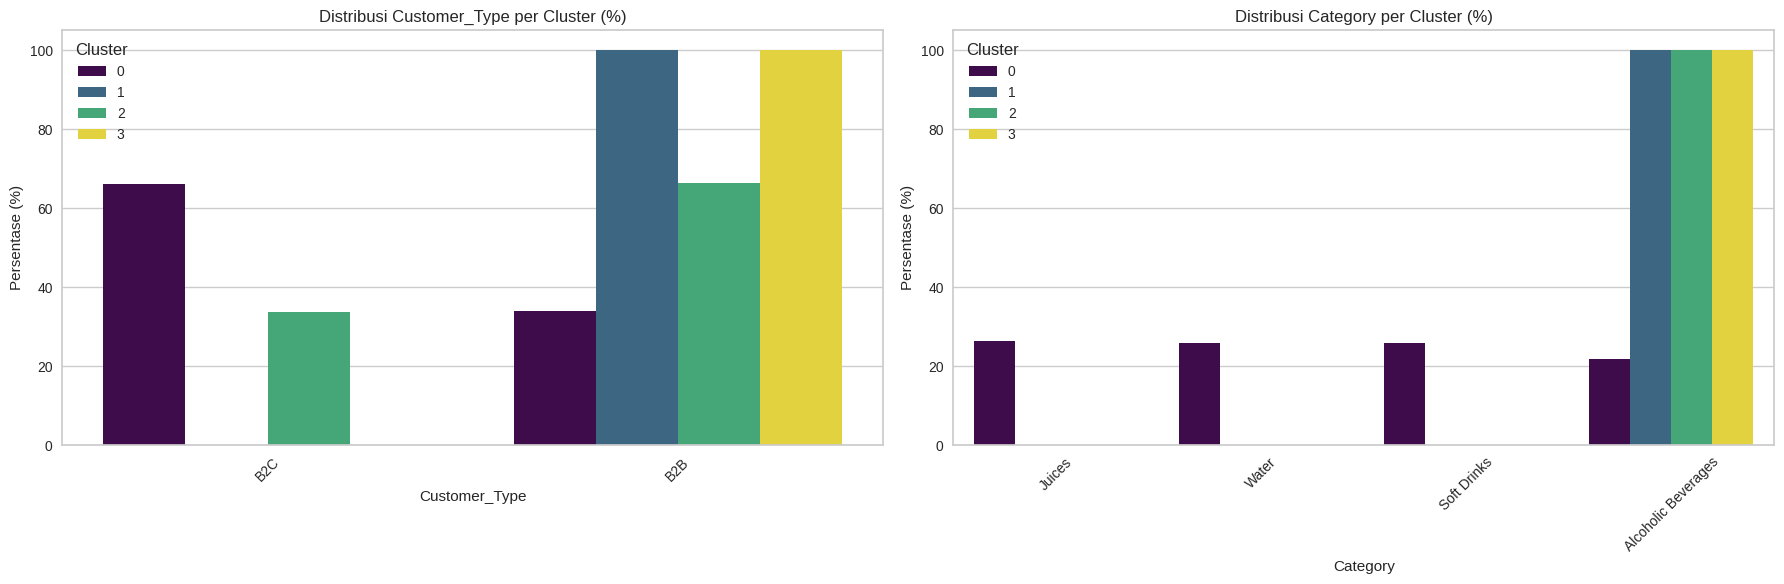

In [107]:
# Fitur kategorikal yang akan dianalisis
categorical_features = ['Customer_Type', 'Category']

# Mengatur jumlah subplots sesuai dengan jumlah fitur (1 baris, 3 kolom)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Loop untuk setiap fitur kategorikal
for i, feature in enumerate(categorical_features):
    # Menghitung distribusi persentase
    category_percent = data.groupby("Cluster")[feature].value_counts(normalize=True).mul(100).rename("percentage").reset_index()

    # Membuat plot
    sns.barplot(data=category_percent, x=feature, y="percentage", hue="Cluster", palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribusi {feature} per Cluster (%)")
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    axes[i].set_ylabel("Persentase (%)")

plt.tight_layout()
plt.show()

In [108]:
def analyze_clusters(df, k_optimal, df_numeric, df_categorical):
    print("Analisis Karakteristik Setiap Cluster:\n")

    for cluster_id in range(k_optimal):
        # Mengambil data untuk cluster saat ini
        cluster_data = df[df['Cluster'] == cluster_id]

        print(f"Cluster {cluster_id}:")

        # Analisis fitur numerik
        print("\n📊 Fitur Numerik:")
        for feature in df_numeric:
            print(f"{feature}: Min = {cluster_data[feature].min():.2f}, "
                  f"Max = {cluster_data[feature].max():.2f}, "
                  f"Mean = {cluster_data[feature].mean():.2f}")

        # Analisis fitur kategorikal
        print("\n📌 Fitur Kategorikal:")
        for feature in df_categorical:
            mode_value = cluster_data[feature].mode()[0] if not cluster_data[feature].mode().empty else "Tidak Ada Data"
            print(f"{feature}: Modus = {mode_value}")

        print("\n" + "-"*50 + "\n")  # Pemisah antar cluster

# Menentukan kolom numerik dan kategorikal
df_numeric = df.select_dtypes(include=['number']).columns.tolist()
df_categorical = df.select_dtypes(exclude=['number']).columns.tolist()

# Panggil fungsi untuk analisis
analyze_clusters(df, k_optimal, df_numeric, df_categorical)


Analisis Karakteristik Setiap Cluster:

Cluster 0:

📊 Fitur Numerik:
Unit_Price: Min = 0.32, Max = 112.46, Mean = 3.85
Quantity: Min = 1.00, Max = 100.00, Mean = 21.81
Discount: Min = 0.00, Max = 0.15, Mean = 0.03
Total_Price: Min = 0.38, Max = 572.42, Mean = 54.23
Cluster: Min = 0.00, Max = 0.00, Mean = 0.00

📌 Fitur Kategorikal:
Customer_Type: Modus = B2C
Product: Modus = Hohes C Orange
Category: Modus = Juices
Region: Modus = Bremen

--------------------------------------------------

Cluster 1:

📊 Fitur Numerik:
Unit_Price: Min = 27.44, Max = 115.07, Mean = 54.64
Quantity: Min = 25.00, Max = 100.00, Mean = 74.47
Discount: Min = 0.05, Max = 0.15, Mean = 0.10
Total_Price: Min = 2276.59, Max = 5560.85, Mean = 3430.63
Cluster: Min = 1.00, Max = 1.00, Mean = 1.00

📌 Fitur Kategorikal:
Customer_Type: Modus = B2B
Product: Modus = Johnnie Walker
Category: Modus = Alcoholic Beverages
Region: Modus = Sachsen-Anhalt

--------------------------------------------------

Cluster 2:

📊 Fitur Nume

Tulis hasil interpretasinya di sini.

1. **Cluster 0** → **Pembelian kecil & murah**, tanpa diskon.  
2. **Cluster 1** → **Pembelian besar & produk mahal**, dengan sedikit diskon.  
3. **Cluster 2** → **Pembelian sedang & produk mahal**, dengan diskon kecil.  
4. **Cluster 3** → **Pembelian sangat besar & produk premium**, dengan transaksi tertinggi.

### **Cluster 0**
- **Rata-rata Unit_Price rendah (3.85)**  
- **Rata-rata Quantity tidak terlalu besar (21.81)**  
- **Rata-rata Discount kecil (0.03)**  
- **Rata-rata Total_Price rendah (54.23)**  
- **Mayoritas Customer_Type:** B2C  
- **Mayoritas Kategori Produk:** Juices (Hohes C Orange)  
- **Mayoritas Wilayah:** Bremen  
- **Analisis:** Cluster ini berisi transaksi retail (B2C) dengan harga satuan dan jumlah pembelian yang rendah, serta diskon kecil. Total pembelanjaan cenderung kecil karena pembelian bersifat pribadi atau kebutuhan sehari-hari.

---

### **Cluster 1**
- **Rata-rata Unit_Price tinggi (54.64)**  
- **Rata-rata Quantity sangat besar (74.47)**  
- **Rata-rata Discount cukup tinggi (0.10)**  
- **Rata-rata Total_Price tinggi (3,430.63)**  
- **Mayoritas Customer_Type:** B2B  
- **Mayoritas Kategori Produk:** Alcoholic Beverages (Johnnie Walker)  
- **Mayoritas Wilayah:** Sachsen-Anhalt  
- **Analisis:** Cluster ini mencerminkan pembelian grosir oleh pelanggan bisnis (B2B), dengan harga dan jumlah produk yang tinggi, serta diskon cukup besar. Total pembelanjaan besar, menunjukkan skala pembelian yang besar untuk dijual kembali atau konsumsi korporat.

---

### **Cluster 2**
- **Rata-rata Unit_Price cukup tinggi (45.21)**  
- **Rata-rata Quantity menengah (43.24)**  
- **Rata-rata Discount sedang (0.06)**  
- **Rata-rata Total_Price sedang (1,093.89)**  
- **Mayoritas Customer_Type:** B2B  
- **Mayoritas Kategori Produk:** Alcoholic Beverages (Veuve Clicquot)  
- **Mayoritas Wilayah:** Bayern  
- **Analisis:** Cluster ini menunjukkan transaksi B2B dengan harga satuan tinggi namun volume pembelian yang lebih kecil dibanding cluster lain. Total pembelian menengah, cocok untuk bisnis berskala menengah atau kebutuhan khusus (misalnya event).

---

### **Cluster 3**
- **Rata-rata Unit_Price paling tinggi (104.94)**  
- **Rata-rata Quantity terbesar (84.08)**  
- **Rata-rata Discount cukup tinggi (0.10)**  
- **Rata-rata Total_Price paling tinggi (7,836.13)**  
- **Mayoritas Customer_Type:** B2B  
- **Mayoritas Kategori Produk:** Alcoholic Beverages (Veuve Clicquot)  
- **Mayoritas Wilayah:** Rheinland-Pfalz  
- **Analisis:** Cluster ini mewakili pembelian dalam jumlah dan nilai terbesar oleh pelanggan bisnis. Produk yang dibeli sangat mahal dan dibeli dalam jumlah besar, sehingga total transaksi sangat tinggi. Cocok untuk perusahaan besar atau distributor.


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  19999 non-null  object 
 1   Product        19999 non-null  object 
 2   Category       19999 non-null  object 
 3   Unit_Price     19999 non-null  float64
 4   Quantity       19999 non-null  int64  
 5   Discount       19999 non-null  float64
 6   Total_Price    19999 non-null  float64
 7   Region         19999 non-null  object 
 8   Cluster        19999 non-null  int32  
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


<ipython-input-110-56fc889b1a15>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




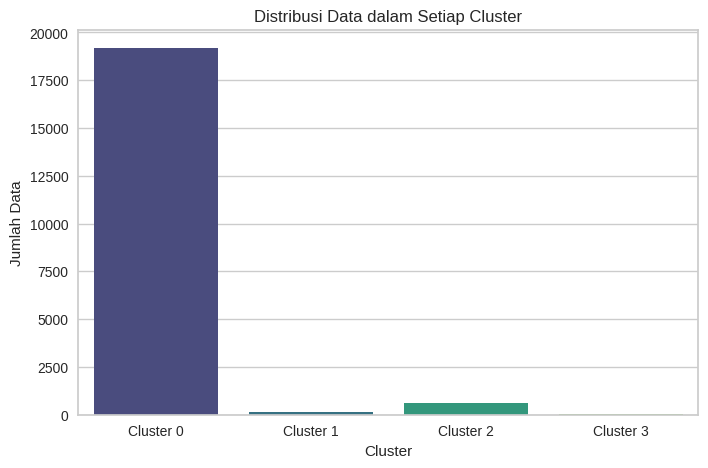

In [110]:
cluster_counts = df['Cluster'].value_counts().sort_index()

# Buat bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Tambahkan label
plt.xlabel("Cluster")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Data dalam Setiap Cluster")
plt.xticks(ticks=cluster_counts.index, labels=[f"Cluster {i}" for i in cluster_counts.index])
plt.show()

<ipython-input-111-384babf8e57b>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




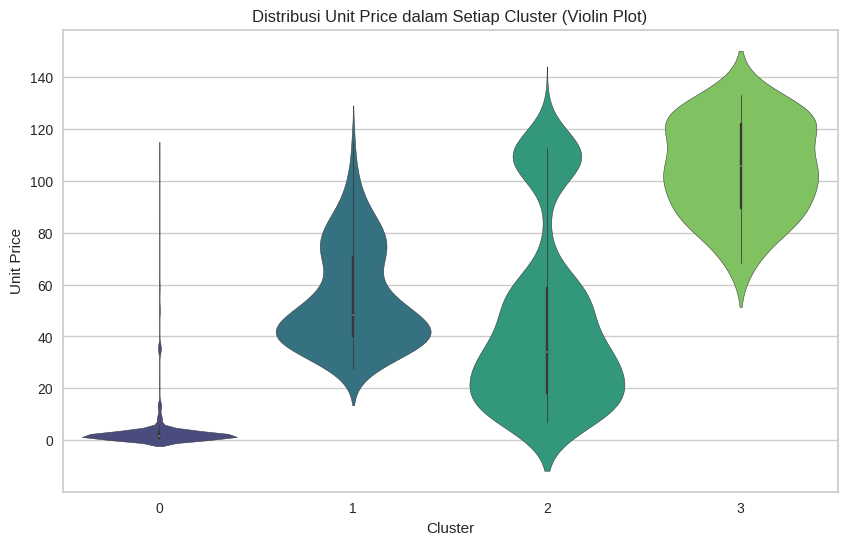

In [111]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Cluster", y="Unit_Price", data=df, palette="viridis")

plt.xlabel("Cluster")
plt.ylabel("Unit Price")
plt.title("Distribusi Unit Price dalam Setiap Cluster (Violin Plot)")
plt.show()


## **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [112]:
df.to_csv("Dataset_Klasifikasi.csv", index=False)